# Load Files, Extract and Visualize Dimers

In [1]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.collections as clt
import pandas as pd
import string as st
import scipy.spatial as spp
import scipy.optimize as spo
import sympy as smp
import copy as cp
import pickle
import os
import sys

from IPython.display import HTML

smp.init_printing()
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Load File

In [2]:
file = "C:/users/aortiza/Desktop/NematicPhase/Field_a/field_6"

A list of files is given by:

In [3]:
dirc = "C:/users/aortiza/Desktop/NematicPhase/Field_a/"
files = os.scandir(dirc)
base_names = [os.path.splitext(file.name)[0] for file in files if file.name.endswith(".lammpstrj")]

I tried to load the trajectory using:

    sim = pickle.load(open( file+".p", "rb" ))
    trj = lmp.trj_lazyread(file+".lammpstrj").readtrj()
    
but this takes more than half an hour. 

I have a couple of options. 
* One is only load a single frame. I can then use this frame to test the order parameters which is the purpose of this notebook (I won't be able to test the time correlation function)
* The other is to addapt the readtrj method to only read a subset of all the frames. This will be useful in general for large datasets. However, it still won't allow us to do any processing of the full dataset. 
* The last option is to create a function to transform a .lammpstrj to a .hdf5 file, which can then be accessed on the fly.

I should work on the last two options. For now, I will simply read a subset of the data. I'll work on an .hdf5 file when I need it so that I can have an application oriented development.

In [4]:
sim = pickle.load(open( file+".p", "rb" ))

In [5]:
%%time
trj = lmp.trj_lazyread(file+".lammpstrj")
trj = trj[0::100]

Wall time: 3.18 s


In [6]:
HTML(lmp.display_animation_direct(sim,trj,start=0,end=120,step=1,speedup=15))

# Get Dimers

In [7]:
%%time 
dim = lmp.dimers(trj, sim, distance=3)
dim

Wall time: 2.13 s


# Get Vectors

This function is now saved in the support functions as: 

    dimers_findpositions(dim,sim)
    
and the support function
    
    dimer_unwrap(center,direction,sim)

In [8]:
dim = lmp.dimers_findpositions(dim,trj,sim)

# Dimer Visualization

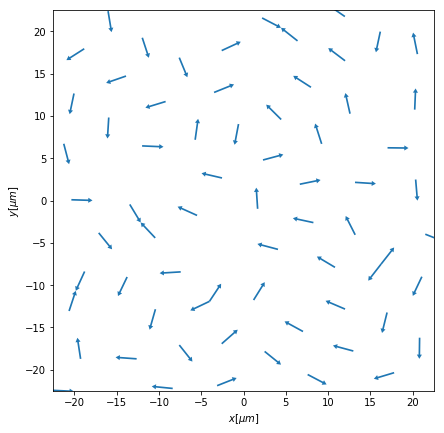

In [9]:
lmp.draw_dim(dim,sim)

## Animation

In [10]:
anim = lmp.animate_dim(dim,sim,start=0,end=120,step=1,speedup=15)
HTML(anim.to_html5_video())